<a href="https://colab.research.google.com/github/linah31/AD_classification/blob/main/beforecv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Dataset

In [ ]:
mv kaggle.json /root/.kaggle/


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
! mkdir ~/.kaggle

! cp kaggle (2).json ~/.kaggle/


mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: ` cp kaggle (2).json ~/.kaggle/'


In [ ]:
! kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           2008         40  1.0              
marouandaghmoumi/dropout-and-success-student-data-analysis   Dropout and Success: Student Data Analysis   87KB  2023-12-31 15:44:56           1444         38  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3482        282  1.0              
risakashiwabara/netfllixrecommended-topic-for-long-vacation  😊📺 Netfllix data😊📺                            1KB  202

In [ ]:
! kaggle competitions download -c 'sachinkumar413/alzheimer-mri-dataset'

!kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset

403 - Forbidden - Permission 'competitions.participate' was denied
 61% 17.0M/28.0M [00:00<00:00, 88.3MB/s]
100% 28.0M/28.0M [00:00<00:00, 110MB/s] 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
!cd .. && mkdir input
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset
!unzip alzheimer-mri-dataset.zip
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
!unzip alzheimer-mri-dataset.zip

original_data_dir = '/content/Dataset'

In [ ]:
pip install split-folders[full]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


import splitfolders

# Set the base directory for the split images
output_folder = '/kaggle/working/Splitted'

# Set the ratio of images for each split
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Use the splitfolders library to split the images into train-validation-test sets
splitfolders.ratio(original_data_dir, output_folder, seed=42,
                   ratio=(train_ratio,
                          validation_ratio,
                          test_ratio))

BATCH_SIZE = 16
IMG_SIZE = (128, 128)
SEED = 1345

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Keep existing rescaling
    shear_range=0.2,
    zoom_range=0.2,
    featurewise_center=True,  # Pixel normalization
    featurewise_std_normalization=True  # Pixel normalization
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True
)

# Define directories for train, validation, and test sets
train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'

# Define generators for train and validation sets using flow_from_directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical')

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical')

epochs = 20

Copying files: 6400 files [00:00, 8043.08 files/s]


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


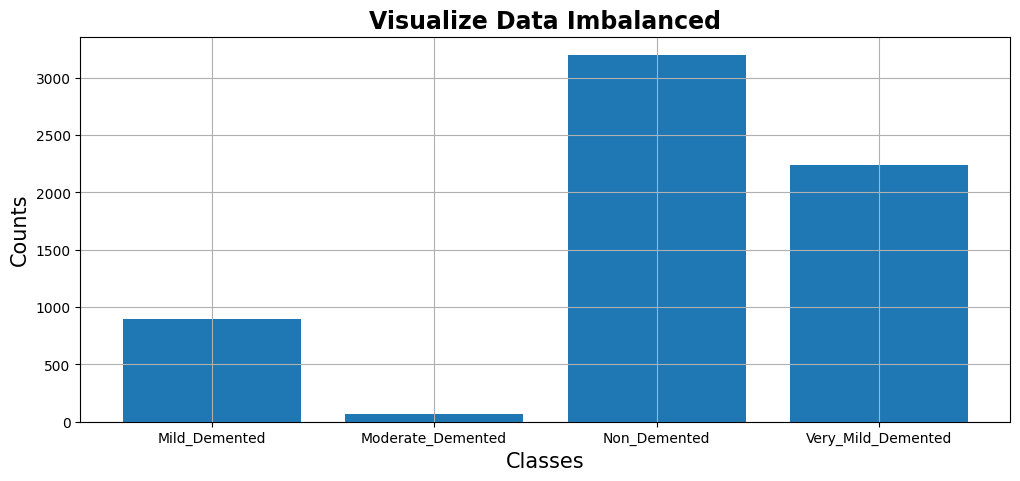

In [ ]:
def data_augmentar():

    data_augmentation = Sequential()
    data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
    data_augmentation.add(RandomZoom((-0.3, -0.1)))

    return data_augmentation

data_augmentation = data_augmentar()
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))
class_names = list(train_generator.class_indices.keys())
class_counts = dict()
for folder in class_names:
    class_counts[folder] = len(os.listdir(original_data_dir+'/'+folder))
class_counts


plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes', fontdict={'fontsize':15})
plt.ylabel('Counts', fontdict={'fontsize':15})
plt.title('Visualize Data Imbalanced', fontdict={'fontsize':17,
                                                 'fontweight':'bold'})
plt.grid(True)
plt.show()

In [ ]:

total = sum(class_counts.values())
number_of_classes = len([ 'MildDemented',
 'ModerateDemented',
 'NonDemented',
 'VeryMildDemented'])

class_weights = dict()
for i in range(number_of_classes):
    class_weights[i] = round(total / (number_of_classes * list(class_counts.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weights[i]}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


In [ ]:
# Assuming you have already defined train_generator, validation_generator, and test_generator

# Train set
train_class_counts = {class_name: len(os.listdir(os.path.join(train_generator.directory, class_name))) for class_name in train_generator.class_indices.keys()}

# Validation set
validation_class_counts = {class_name: len(os.listdir(os.path.join(validation_generator.directory, class_name))) for class_name in validation_generator.class_indices.keys()}

# Test set
test_class_counts = {class_name: len(os.listdir(os.path.join(test_generator.directory, class_name))) for class_name in test_generator.class_indices.keys()}

# Print counts for each class
print("Train set class counts:", train_class_counts)
print("Validation set class counts:", validation_class_counts)
print("Test set class counts:", test_class_counts)


Train set class counts: {'Mild_Demented': 716, 'Moderate_Demented': 51, 'Non_Demented': 2560, 'Very_Mild_Demented': 1792}
Validation set class counts: {'Mild_Demented': 89, 'Moderate_Demented': 6, 'Non_Demented': 320, 'Very_Mild_Demented': 224}
Test set class counts: {'Mild_Demented': 91, 'Moderate_Demented': 7, 'Non_Demented': 320, 'Very_Mild_Demented': 224}


# VGG

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

def VGG16():
    input_layer = Input(shape=(128, 128, 3))

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_layer)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(1000, activation='softmax', name='predictions')(x)

    model3 = Model(inputs=input_layer, outputs=x)
    return model

In [ ]:
from keras.applications import VGG16
from keras.layers import Input

# Define the input layer with the specified shape
input_layer = Input(shape=(128, 128, 3))

# Initialize VGG16 with ImageNet weights, excluding top layers
base_model_3 = VGG16(weights="imagenet", include_top=False)

# Set all layers in the base model to be non-trainable
for layer in base_model_3.layers:
    layer.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model3 = tf.keras.Sequential([base_model_3, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy',
                        tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        ])


# Train your model with mixed precision
history = model3.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs = epochs,
                    verbose=1)

58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/20
80/80 [==============================] - 49s 406ms/step - loss: 0.9497 - accuracy: 0.5403 - auc: 0.8278 - precision: 0.6176 - recall: 0.3831 - val_loss: 1.0003 - val_accuracy: 0.5008 - val_auc: 0.8346 - val_precision: 0.6130 - val_recall: 0.4413
Epoch 2/20
80/80 [==============================] - 30s 369ms/step - loss: 0.7886 - accuracy: 0.6365 - auc: 0.8843 - precision: 0.7020 - recall: 0.5220 - val_loss: 0.9617 - val_accuracy: 0.5274 - val_auc: 0.8394 - val_precision: 0.6259 - val_recall: 0.4006
Epoch 3/20
80/80 [==============================] - 28s 354ms/step - loss: 0.6921 - accuracy: 0.6972 - auc: 0.9123 - precision: 0.7422 - recall: 0.6210 - val_loss: 0.8801 - val_accuracy: 0.6338 - val_auc: 0.8767 - val_precision: 0.7578 - val_recall: 0.3818
Epoch 4/20
80/80 [==============================] - 28s 349ms/step - loss: 0.6335 - accuracy: 0.7206 - auc: 0.9272 - precision: 0.7535 - recall: 0.6704 - val_loss: 

In [ ]:
models=[]
acc=[]
acc2=[]
models.append("VGG 16")
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
result = model3.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')



80/80 [==============================] - 27s 332ms/step - loss: 0.1362 - accuracy: 0.9500 - auc: 0.9952 - precision: 0.9512 - recall: 0.9478
Train Loss = 0.13620370626449585
Train Accuracy = 0.9499902129173279
Train AUC = 0.9952241778373718
Train Precision = 0.9511860609054565
Train Recall = 0.9478413462638855


In [ ]:
filepath = './Vgg_best_weights.hdf5'
# Stop the model when accuracy is not improving
earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)
# Finding point where accuracy differs more
checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
history3=model3.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator)//32,
                        epochs = 20,callbacks = callback_list,
                        verbose = 1,batch_size=32)

Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.9453 - auc: 0.9973 - precision: 0.9453 - recall: 0.9453
Epoch 1: val_accuracy improved from -inf to 0.92958, saving model to ./Vgg_best_weights.hdf5
2/2 [==============================] - 2s 2s/step - loss: 0.1303 - accuracy: 0.9453 - auc: 0.9973 - precision: 0.9453 - recall: 0.9453 - val_loss: 0.1742 - val_accuracy: 0.9296 - val_auc: 0.9942 - val_precision: 0.9340 - val_recall: 0.9296
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9688 - auc: 0.9979 - precision: 0.9685 - recall: 0.9609
Epoch 2: val_accuracy improved from 0.92958 to 0.94053, saving model to ./Vgg_best_weights.hdf5
2/2 [==============================] - 2s 2s/step - loss: 0.1059 - accuracy: 0.9688 - auc: 0.9979 - precision: 0.9685 - recall: 0.9609 - val_loss: 0.1689 - val_accuracy: 0.9405 - val_auc: 0.9943 - val_precision: 0.9448 - val_recall: 0.9374
Epoch 3/20
2/2 [=============================

In [ ]:
model3.evaluate(test_generator)


11/11 [==============================] - 2s 184ms/step - loss: 0.1747 - accuracy: 0.9346 - auc: 0.9939 - precision: 0.9372 - recall: 0.9299


[0.17466244101524353,
 0.9345794320106506,
 0.9939280152320862,
 0.9372056722640991,
 0.9299065470695496]

In [ ]:
result = model3.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')
acc.append(test_accuracy*100)

11/11 [==============================] - 1s 79ms/step - loss: 0.1747 - accuracy: 0.9346 - auc: 0.9939 - precision: 0.9372 - recall: 0.9299
Test Loss = 0.17466244101524353
Test Accuracy = 0.9345794320106506
Test AUC = 0.9939280152320862
Test Precision = 0.9372056722640991
Test Recall = 0.9299065470695496


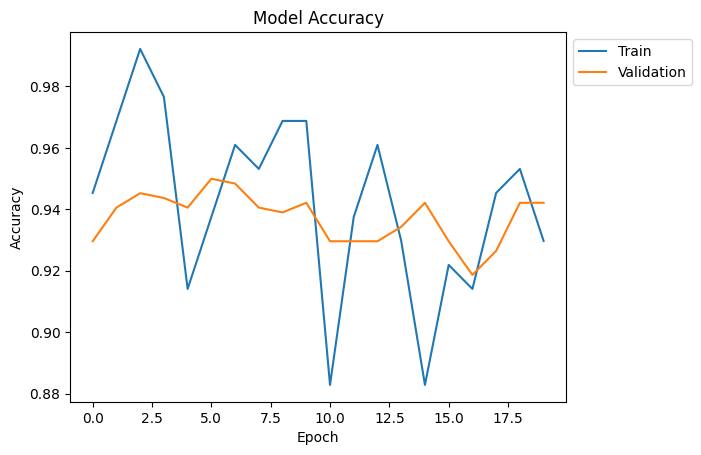

In [ ]:

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

11/11 [==============================] - 1s 79ms/step


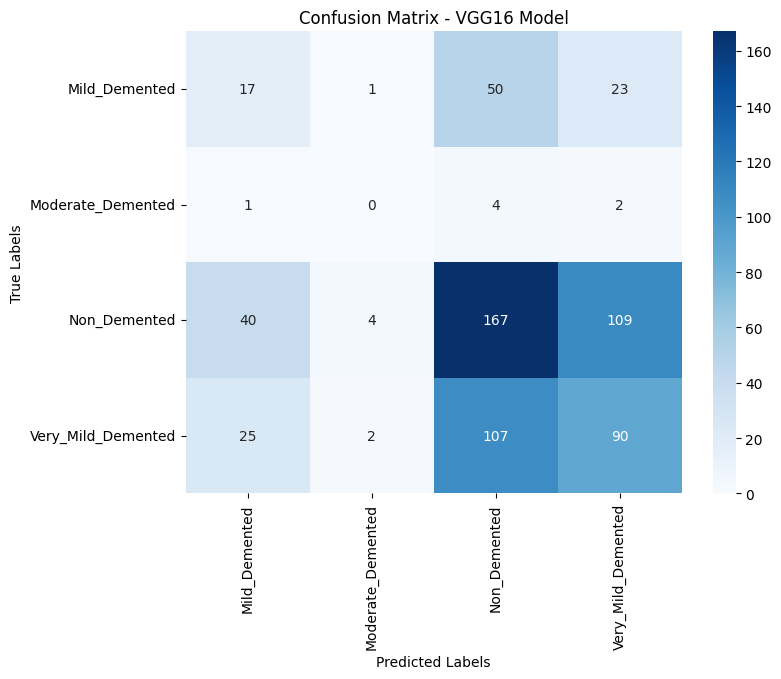

Classification Report:
                     precision    recall  f1-score   support

     Mild_Demented       0.20      0.19      0.20        91
 Moderate_Demented       0.00      0.00      0.00         7
      Non_Demented       0.51      0.52      0.52       320
Very_Mild_Demented       0.40      0.40      0.40       224

          accuracy                           0.43       642
         macro avg       0.28      0.28      0.28       642
      weighted avg       0.42      0.43      0.42       642



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model3.predict(test_generator)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for the test set
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - VGG16 Model')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))


80/80 [==============================] - 27s 342ms/step - loss: 0.0631 - accuracy: 0.9762 - auc: 0.9989 - precision: 0.9779 - recall: 0.9754 - val_loss: 0.1543 - val_accuracy: 0.9437 - val_auc: 0.9949 - val_precision: 0.9466 - val_recall: 0.9437


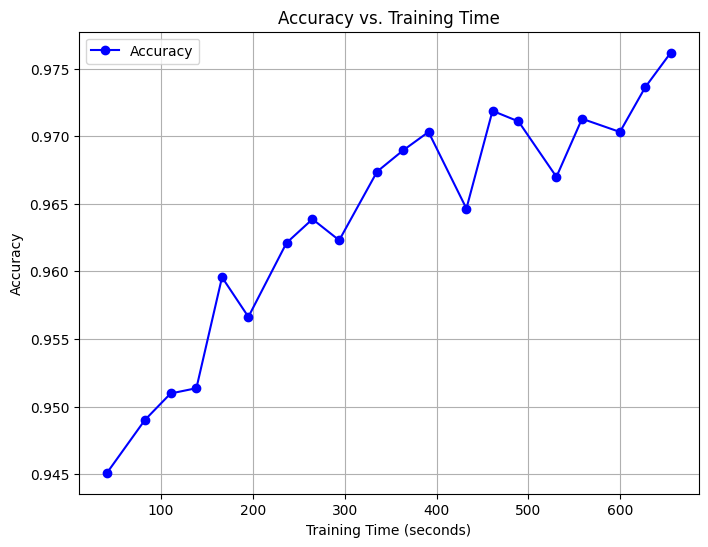

In [ ]:
import time

# Initialize lists to store training time and accuracy
training_times = []
accuracies = []

# Record start time
start_time = time.time()

# Initialize epoch counter
epoch = 0

while epoch < epochs:
    # Training code here
    history = model3.fit(train_generator, validation_data=validation_generator, steps_per_epoch=len(train_generator), epochs=1, verbose=1)

    # Record accuracy after each epoch
    accuracy = history.history['accuracy'][0]
    accuracies.append(accuracy)

    # Record current time
    current_time = time.time()

    # Calculate elapsed time
    elapsed_time = current_time - start_time
    training_times.append(elapsed_time)

    # Check if early stopping condition is met
    if earlystopping.stopped_epoch > 0:
        print(f'Early stopping triggered after {earlystopping.stopped_epoch + 1} epochs.')
        break

    # Increment epoch counter
    epoch += 1

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(training_times, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(f'Training Time: {training_times}')
print(f'Accuracies: {accuracies}')


Training Time: [41.25958442687988, 82.50118112564087, 110.4227340221405, 138.49587750434875, 166.39956784248352, 195.11446738243103, 236.61644172668457, 264.86276173591614, 293.9880578517914, 335.2424032688141, 363.41456174850464, 391.2257947921753, 432.48356080055237, 460.90538239479065, 489.1543142795563, 530.4841639995575, 558.3635704517365, 599.6153945922852, 627.3077266216278, 654.9206650257111]
Accuracies: [0.9451064467430115, 0.9490134716033936, 0.950967013835907, 0.9513576626777649, 0.9595624208450317, 0.956632137298584, 0.9621019959449768, 0.9638601541519165, 0.9622973203659058, 0.9673764109611511, 0.9689392447471619, 0.9703066945075989, 0.9646415114402771, 0.9718695282936096, 0.9710881114006042, 0.9669857621192932, 0.9712834358215332, 0.9703066945075989, 0.9736276865005493, 0.9761672019958496]


In [ ]:
if earlystopping.stopped_epoch > 0:
    print(f'Early stopping triggered after {earlystopping.stopped_epoch + 1} epochs.')


# ResNet50

In [ ]:

base_model_2 = tf.keras.applications.ResNet50(input_shape=(128,128,3),
                                               include_top=False,
                                               weights='imagenet')
base_model_2.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model2 = tf.keras.Sequential([base_model_2, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])

In [ ]:
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy',
                        tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),
                        ])


# Train your model with mixed precision
history = model2.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch=len(train_generator),
                    epochs = epochs,
                    verbose=1)

Epoch 1/20
80/80 [==============================] - 37s 366ms/step - loss: 0.9599 - accuracy: 0.5464 - auc_1: 0.8244 - precision_1: 0.6423 - recall_1: 0.3505 - val_loss: 1.0750 - val_accuracy: 0.4945 - val_auc_1: 0.7952 - val_precision_1: 0.3333 - val_recall_1: 0.0031
Epoch 2/20
80/80 [==============================] - 28s 345ms/step - loss: 0.8775 - accuracy: 0.5950 - auc_1: 0.8541 - precision_1: 0.6770 - recall_1: 0.4270 - val_loss: 0.9901 - val_accuracy: 0.5149 - val_auc_1: 0.8256 - val_precision_1: 0.7967 - val_recall_1: 0.2269
Epoch 3/20
80/80 [==============================] - 28s 350ms/step - loss: 0.8324 - accuracy: 0.6113 - auc_1: 0.8703 - precision_1: 0.6940 - recall_1: 0.4798 - val_loss: 0.9455 - val_accuracy: 0.5290 - val_auc_1: 0.8345 - val_precision_1: 0.6737 - val_recall_1: 0.3975
Epoch 4/20
80/80 [==============================] - 28s 347ms/step - loss: 0.7840 - accuracy: 0.6406 - auc_1: 0.8855 - precision_1: 0.7048 - recall_1: 0.5358 - val_loss: 0.8834 - val_accuracy: 

In [ ]:
models.append("ResNet50")
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
result = model2.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')


80/80 [==============================] - 26s 331ms/step - loss: 0.2709 - accuracy: 0.8931 - auc_1: 0.9860 - precision_1: 0.9005 - recall_1: 0.8844
Train Loss = 0.27087730169296265
Train Accuracy = 0.8931431770324707
Train AUC = 0.986016571521759
Train Precision = 0.9005370736122131
Train Recall = 0.8843523859977722


In [ ]:
filepath = './Resnet50_best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
history2=model2.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator)//32,
                        epochs = 20,callbacks = callback_list,
                        verbose = 1,batch_size=16)

Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8672 - auc_1: 0.9755 - precision_1: 0.8661 - recall_1: 0.8594
Epoch 1: val_accuracy improved from -inf to 0.81064, saving model to ./Resnet50_best_weights.hdf5
2/2 [==============================] - 3s 2s/step - loss: 0.3844 - accuracy: 0.8672 - auc_1: 0.9755 - precision_1: 0.8661 - recall_1: 0.8594 - val_loss: 0.4717 - val_accuracy: 0.8106 - val_auc_1: 0.9644 - val_precision_1: 0.8156 - val_recall_1: 0.8028
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 0.3219 - accuracy: 0.9141 - auc_1: 0.9801 - precision_1: 0.9280 - recall_1: 0.9062
Epoch 2: val_accuracy did not improve from 0.81064
2/2 [==============================] - 2s 2s/step - loss: 0.3219 - accuracy: 0.9141 - auc_1: 0.9801 - precision_1: 0.9280 - recall_1: 0.9062 - val_loss: 0.4708 - val_accuracy: 0.8091 - val_auc_1: 0.9639 - val_precision_1: 0.8123 - val_recall_1: 0.8059
Epoch 3/20
2/2 [==============================] -

In [ ]:
model2.evaluate(test_generator)


11/11 [==============================] - 1s 130ms/step - loss: 0.6181 - accuracy: 0.7944 - auc_1: 0.9483 - precision_1: 0.8013 - recall_1: 0.7913


[0.618114709854126,
 0.7943925261497498,
 0.9483227729797363,
 0.801261842250824,
 0.7912772297859192]

In [ ]:
result = model2.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')
acc.append(test_accuracy*100)

11/11 [==============================] - 1s 66ms/step - loss: 0.6181 - accuracy: 0.7944 - auc_1: 0.9483 - precision_1: 0.8013 - recall_1: 0.7913
Test Loss = 0.6181142330169678
Test Accuracy = 0.7943925261497498
Test AUC = 0.9483227729797363
Test Precision = 0.801261842250824
Test Recall = 0.7912772297859192


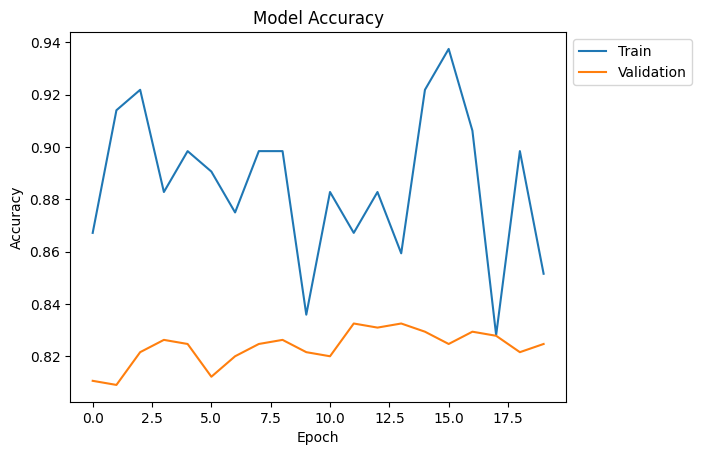

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

11/11 [==============================] - 2s 70ms/step


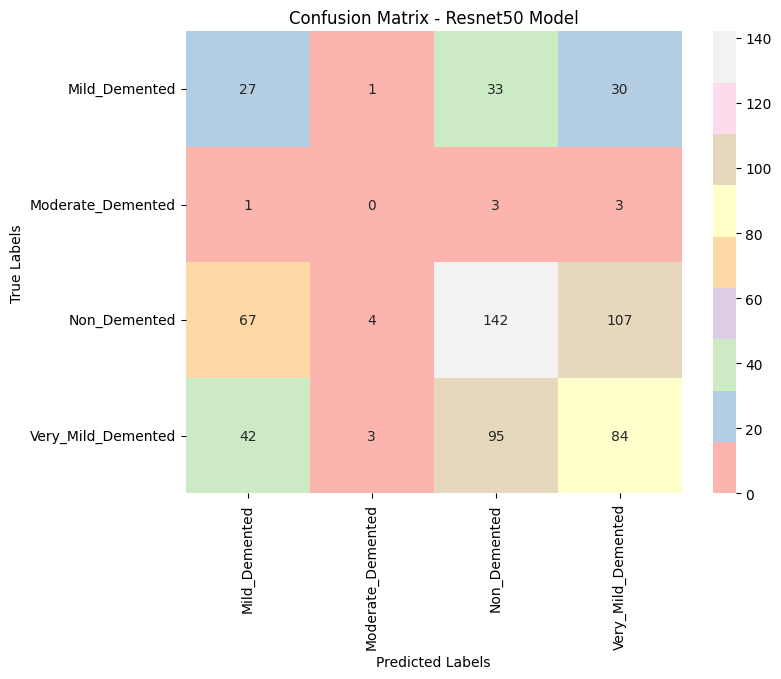

Classification Report:
                     precision    recall  f1-score   support

     Mild_Demented       0.20      0.30      0.24        91
 Moderate_Demented       0.00      0.00      0.00         7
      Non_Demented       0.52      0.44      0.48       320
Very_Mild_Demented       0.38      0.38      0.38       224

          accuracy                           0.39       642
         macro avg       0.27      0.28      0.27       642
      weighted avg       0.42      0.39      0.40       642



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = model2.predict(test_generator)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for the test set
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Resnet50 Model')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))


80/80 [==============================] - 27s 343ms/step - loss: 0.1938 - accuracy: 0.9226 - auc_1: 0.9927 - precision_1: 0.9267 - recall_1: 0.9187 - val_loss: 0.3020 - val_accuracy: 0.8951 - val_auc_1: 0.9850 - val_precision_1: 0.9016 - val_recall_1: 0.8889


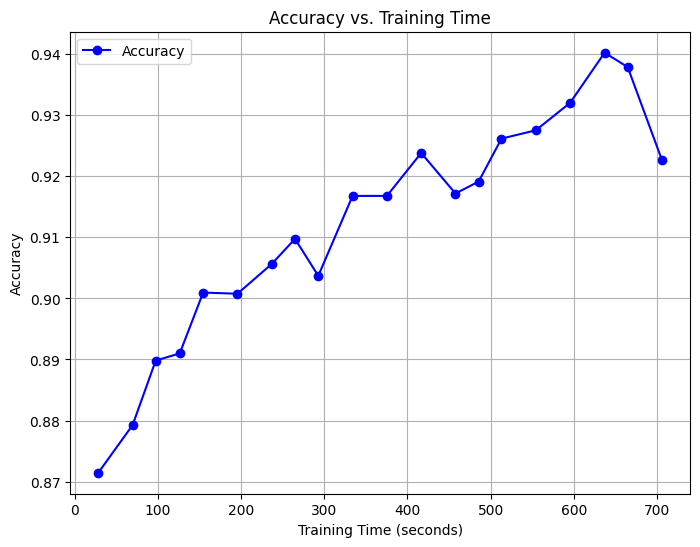

In [ ]:
import time

# Initialize lists to store training time and accuracy
training_times = []
accuracies = []

# Record start time
start_time = time.time()

# Initialize epoch counter
epoch = 0

while epoch < epochs:
    # Training code here
    history = model2.fit(train_generator, validation_data=validation_generator, steps_per_epoch=len(train_generator), epochs=1, verbose=1)

    # Record accuracy after each epoch
    accuracy = history.history['accuracy'][0]
    accuracies.append(accuracy)

    # Record current time
    current_time = time.time()

    # Calculate elapsed time
    elapsed_time = current_time - start_time
    training_times.append(elapsed_time)

    # Check if early stopping condition is met
    if earlystopping.stopped_epoch > 0:
        print(f'Early stopping triggered after {earlystopping.stopped_epoch + 1} epochs.')
        break

    # Increment epoch counter
    epoch += 1

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(training_times, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Time')
plt.legend()
plt.grid(True)
plt.show()


# Conv2D

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

def build_custom_cnn():
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))




    # Flatten and fully connected layers
    model.add(BatchNormalization())
    #model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Assuming 4 output classes

    return model

# Build the custom CNN
custom_cnn_model = build_custom_cnn()

# Compile the model
custom_cnn_model.compile(optimizer = Adam(learning_rate=0.0001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy',
                                  tf.keras.metrics.AUC(),
                                  tf.keras.metrics.Precision(),
                                  tf.keras.metrics.Recall()])

# Train the model (you can use the same training code as for VGG16 and ResNet50)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_custom_cnn = custom_cnn_model.fit(train_generator,
                                          validation_data=validation_generator,
                                          steps_per_epoch=len(train_generator),
                                          epochs=epochs,
                                          callbacks=[early_stopping],
                                          verbose=1)

# Evaluate the model on the test set
result_custom_cnn = custom_cnn_model.evaluate(test_generator)
test_accuracy_custom_cnn = result_custom_cnn[1]





Epoch 1/20
80/80 [==============================] - 30s 324ms/step - loss: 1.0829 - accuracy: 0.5360 - auc_2: 0.8089 - precision_2: 0.5999 - recall_2: 0.4116 - val_loss: 1.3253 - val_accuracy: 0.5023 - val_auc_2: 0.8097 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
80/80 [==============================] - 26s 320ms/step - loss: 0.8584 - accuracy: 0.6097 - auc_2: 0.8629 - precision_2: 0.6838 - recall_2: 0.4727 - val_loss: 1.2765 - val_accuracy: 0.6338 - val_auc_2: 0.8626 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/20
80/80 [==============================] - 26s 326ms/step - loss: 0.7755 - accuracy: 0.6533 - auc_2: 0.8903 - precision_2: 0.7274 - recall_2: 0.5421 - val_loss: 1.2849 - val_accuracy: 0.3365 - val_auc_2: 0.7123 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/20
80/80 [==============================] - 26s 322ms/step - loss: 0.7180 - accuracy: 0.6800 - auc_2: 0.9056 - precision_2: 0.7353 - recall_2: 0.5903 - val_loss:

In [ ]:
custom_cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)      

In [ ]:
result = custom_cnn_model.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')


11/11 [==============================] - 1s 46ms/step - loss: 0.0908 - accuracy: 0.9704 - auc_2: 0.9989 - precision_2: 0.9733 - recall_2: 0.9657
Test Loss = 0.09080205112695694
Test Accuracy = 0.9704049825668335
Test AUC = 0.9989058375358582
Test Precision = 0.9733123779296875
Test Recall = 0.9657320976257324


In [ ]:
filepath = './Cnn2D_best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [ ]:
history_custom_cnn=custom_cnn_model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator)//32,
                        epochs = 20,callbacks = callback_list,
                        verbose = 1,batch_size=16)

Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9844 - auc_2: 0.9996 - precision_2: 0.9841 - recall_2: 0.9688
Epoch 1: val_accuracy improved from -inf to 0.92801, saving model to ./Cnn2D_best_weights.hdf5
2/2 [==============================] - 2s 2s/step - loss: 0.0664 - accuracy: 0.9844 - auc_2: 0.9996 - precision_2: 0.9841 - recall_2: 0.9688 - val_loss: 0.1804 - val_accuracy: 0.9280 - val_auc_2: 0.9933 - val_precision_2: 0.9276 - val_recall_2: 0.9218
Epoch 2/20
2/2 [==============================] - ETA: 0s - loss: 0.0962 - accuracy: 0.9609 - auc_2: 0.9987 - precision_2: 0.9609 - recall_2: 0.9609
Epoch 2: val_accuracy improved from 0.92801 to 0.95149, saving model to ./Cnn2D_best_weights.hdf5
2/2 [==============================] - 5s 4s/step - loss: 0.0962 - accuracy: 0.9609 - auc_2: 0.9987 - precision_2: 0.9609 - recall_2: 0.9609 - val_loss: 0.1268 - val_accuracy: 0.9515 - val_auc_2: 0.9969 - val_precision_2: 0.9529 - val_recall_2: 0.9499
Epoch

In [ ]:
result = custom_cnn_model.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')
acc.append(test_accuracy*100)

11/11 [==============================] - 1s 46ms/step - loss: 0.0563 - accuracy: 0.9829 - auc_2: 0.9996 - precision_2: 0.9844 - recall_2: 0.9829
Test Loss = 0.05629073828458786
Test Accuracy = 0.9828660488128662
Test AUC = 0.9996013641357422
Test Precision = 0.9843993782997131
Test Recall = 0.9828660488128662


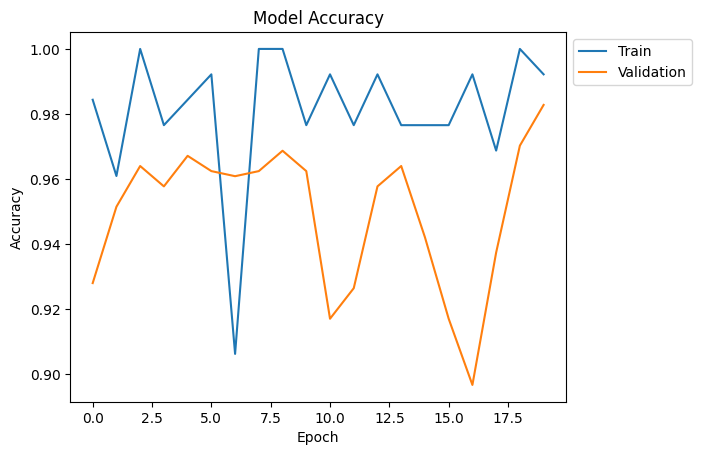

In [ ]:
plt.plot(history_custom_cnn.history['accuracy'])
plt.plot(history_custom_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

11/11 [==============================] - 1s 43ms/step


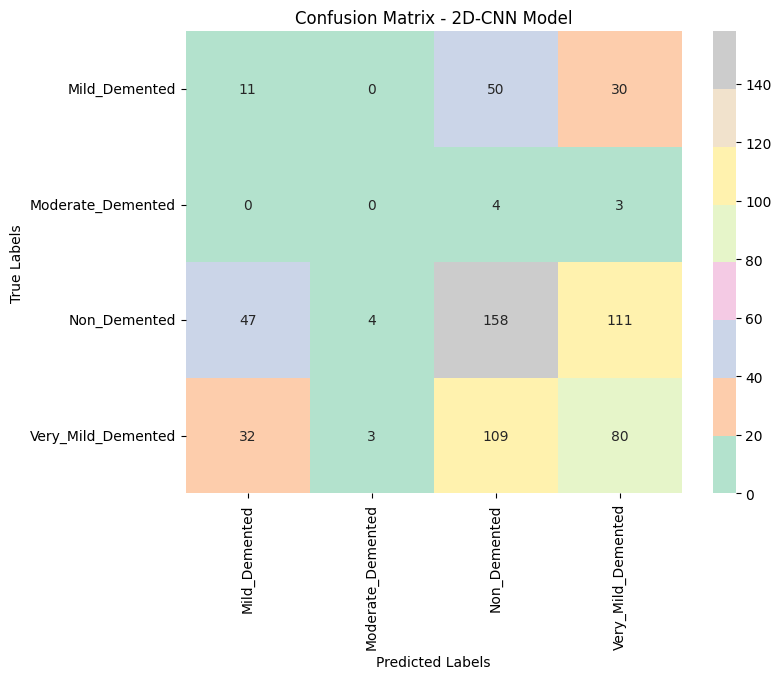

Classification Report:
                     precision    recall  f1-score   support

     Mild_Demented       0.12      0.12      0.12        91
 Moderate_Demented       0.00      0.00      0.00         7
      Non_Demented       0.49      0.49      0.49       320
Very_Mild_Demented       0.36      0.36      0.36       224

          accuracy                           0.39       642
         macro avg       0.24      0.24      0.24       642
      weighted avg       0.39      0.39      0.39       642



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
y_pred = custom_cnn_model.predict(test_generator)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels for the test set
y_true = test_generator.classes

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel2', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - 2D-CNN Model')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))


80/80 [==============================] - 26s 319ms/step - loss: 0.0227 - accuracy: 0.9936 - auc_2: 0.9999 - precision_2: 0.9937 - recall_2: 0.9936 - val_loss: 0.0513 - val_accuracy: 0.9828 - val_auc_2: 0.9995 - val_precision_2: 0.9828 - val_recall_2: 0.9828


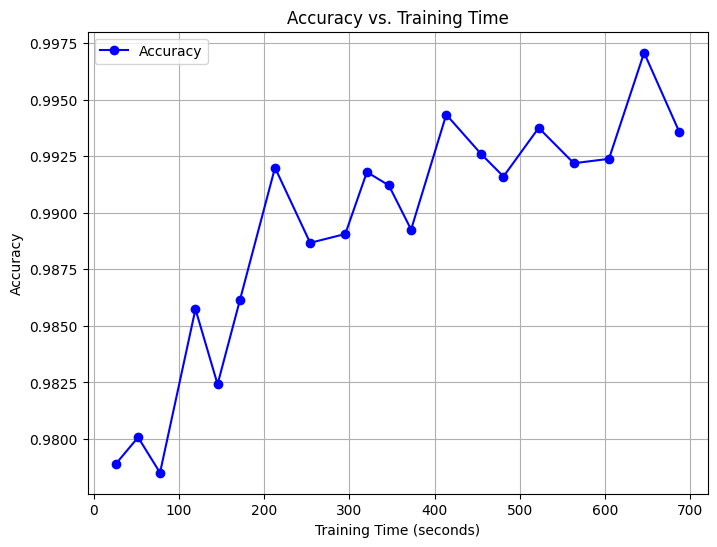

In [ ]:
import time

# Initialize lists to store training time and accuracy
training_times = []
accuracies = []

# Record start time
start_time = time.time()

# Initialize epoch counter
epoch = 0

while epoch < epochs:
    # Training code here
    history = custom_cnn_model.fit(train_generator, validation_data=validation_generator, steps_per_epoch=len(train_generator), epochs=1, verbose=1)

    # Record accuracy after each epoch
    accuracy = history.history['accuracy'][0]
    accuracies.append(accuracy)

    # Record current time
    current_time = time.time()

    # Calculate elapsed time
    elapsed_time = current_time - start_time
    training_times.append(elapsed_time)

    # Check if early stopping condition is met
    if earlystopping.stopped_epoch > 0:
        print(f'Early stopping triggered after {earlystopping.stopped_epoch + 1} epochs.')
        break

    # Increment epoch counter
    epoch += 1

# Plot the graph
plt.figure(figsize=(8, 6))
plt.plot(training_times, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Time')
plt.legend()
plt.grid(True)
plt.show()


# compare

In [ ]:
models.append("CNN2D")
model3.save("vgg.h5")
model2.save("resnet.h5")
custom_cnn_model.save("CNN2D")
models1=["VGG","RESNET50","CNN2D"]
print(models1)
print(acc)

['VGG', 'RESNET50', 'CNN2D']
[93.45794320106506, 79.43925261497498, 98.28660488128662]


In [ ]:
max = acc[0];
maxname = None
if len(acc) > 0:
    max = acc[0]
    maxname = models1[0]
    for i in range(1, len(models1)):
        if acc[i] > max:
            max = acc[i]
            maxname = models1[i]
if maxname == 'vgg':
    model3.save("vgg.h5")
    model3.load_weights("vgg.h5")
elif maxname == 'resnet':
  model2.save("resnet.h5")
  model2.load_weights("resnet.h5")
elif maxname == 'CNN2D':
  model2.save("CNN2D")
  model2.load_weights("CNN2D")


print("Best Accuracy Model is "+maxname+" with accuracy of "+ str(max));
aa=maxname+'.h5'

Best Accuracy Model is CNN2D with accuracy of 98.28660488128662


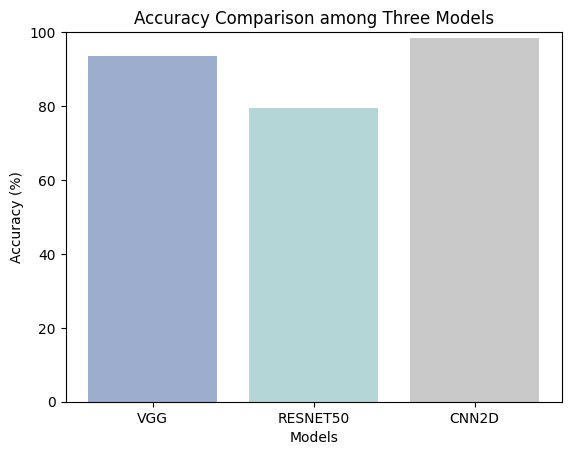

In [ ]:
import matplotlib.pyplot as plt

# Plotting the accuracy values with a bar chart
plt.bar(models1, acc, color=['#9cadce', '#b5d6d6', '#c9c9c9'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison among Three Models')
plt.ylim(0, 100)  # Set the y-axis limits to represent accuracy values between 0 and 100
plt.show()


# without preprocessing

In [ ]:
raw_train_datagen = ImageDataGenerator()
raw_validation_datagen = ImageDataGenerator()
raw_test_datagen = ImageDataGenerator()

raw_train_generator = raw_train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    shuffle=True,
    seed=SEED,
    batch_size=64,
    class_mode='categorical'
)

raw_validation_generator = raw_validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    seed=SEED,
    shuffle=True,
    batch_size=64,
    class_mode='categorical'
)

raw_test_generator = raw_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    shuffle=True,
    seed=SEED,
    batch_size=64,
    class_mode='categorical'
)

Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [ ]:
# For VGG16 model
vgg_result_raw = model3.evaluate(raw_test_generator)
# For ResNet50 model
resnet_result_raw = model2.evaluate(raw_test_generator)
# For Custom CNN model
custom_cnn_result_raw = custom_cnn_model.evaluate(raw_test_generator)

# Extract relevant metrics
test_accuracy_vgg = vgg_result_raw[1]
test_accuracy_resnet = resnet_result_raw[1]
test_accuracy_custom_cnn = custom_cnn_result_raw[1]

rawacc=[]
rawacc.append(test_accuracy_vgg)
rawacc.append(test_accuracy_resnet)
rawacc.append(test_accuracy_custom_cnn)

# Print or use the metrics as needed
print(f'Test Accuracy (VGG16): {test_accuracy_vgg}')
print(f'Test Accuracy (ResNet50): {test_accuracy_resnet}')
print(f'Test Accuracy (Custom CNN): {test_accuracy_custom_cnn}')
print(rawacc)

11/11 [==============================] - 0s 38ms/step - loss: 175.0977 - accuracy: 0.8224 - auc_2: 0.8815 - precision_2: 0.8224 - recall_2: 0.8224
Test Accuracy (VGG16): 0.440809965133667
Test Accuracy (ResNet50): 0.4984423816204071
Test Accuracy (Custom CNN): 0.822429895401001
[0.440809965133667, 0.4984423816204071, 0.822429895401001]


In [ ]:
test_loss_vgg = vgg_result_raw[0]
test_accuracy_vgg = vgg_result_raw[1]
test_AUC_vgg = vgg_result_raw[2]
test_pre_vgg = vgg_result_raw[3]
test_rec_vgg = vgg_result_raw[4]

print(f'Test Loss = {test_loss_vgg/1000}')
print(f'Test Accuracy = {test_accuracy_vgg}')
print(f'Test AUC = {test_AUC_vgg}')
print(f'Test Precision = {test_pre_vgg}')
print(f'Test Recall = {test_rec_vgg}')


Test Loss = 0.42690884399414064
Test Accuracy = 0.440809965133667
Test AUC = 0.627924382686615
Test Precision = 0.440809965133667
Test Recall = 0.440809965133667


In [ ]:
test_loss_resnet= resnet_result_raw[0]
test_accuracy_resnet = resnet_result_raw[1]
test_AUC_resnet = resnet_result_raw[2]
test_pre_resnet = resnet_result_raw[3]
test_rec_resnet = resnet_result_raw[4]

print(f'Test Loss = {test_loss_resnet/1000}')
print(f'Test Accuracy = {test_accuracy_resnet}')
print(f'Test AUC = {test_AUC_resnet}')
print(f'Test Precision = {test_pre_resnet}')
print(f'Test Recall = {test_rec_resnet}')

Test Loss = 0.4399107666015625
Test Accuracy = 0.4984423816204071
Test AUC = 0.6656282544136047
Test Precision = 0.4984423816204071
Test Recall = 0.4984423816204071


In [ ]:
test_loss_cnn= custom_cnn_result_raw[0]
test_accuracy_custom_cnn = custom_cnn_result_raw[1]
test_AUC_cnn = custom_cnn_result_raw[2]
test_pre_cnn = custom_cnn_result_raw[3]
test_rec_cnn = custom_cnn_result_raw[4]


print(f'Test Loss = {test_loss_cnn/1000}')
print(f'Test Accuracy = {test_accuracy_custom_cnn}')
print(f'Test AUC = {test_AUC_cnn}')
print(f'Test Precision = {test_pre_cnn}')
print(f'Test Recall = {test_rec_cnn}')

Test Loss = 0.17509771728515625
Test Accuracy = 0.822429895401001
Test AUC = 0.8815277218818665
Test Precision = 0.822429895401001
Test Recall = 0.822429895401001


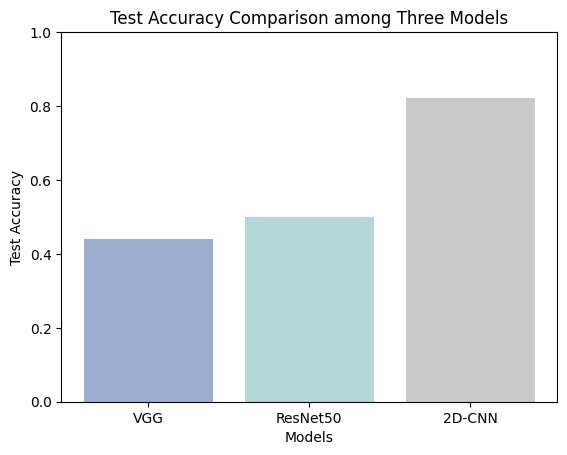

In [ ]:
import matplotlib.pyplot as plt

# List of models
models = ["VGG", "ResNet50", "2D-CNN"]

# Test accuracies
rawacc = [test_accuracy_vgg, test_accuracy_resnet, test_accuracy_custom_cnn]

# Plotting the accuracy values with a bar chart
plt.bar(models, rawacc, color=['#9cadce', '#b5d6d6', '#c9c9c9'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison among Three Models')
plt.ylim(0, 1)  # Set the y-axis limits to represent accuracy values between 0 and 1
plt.show()


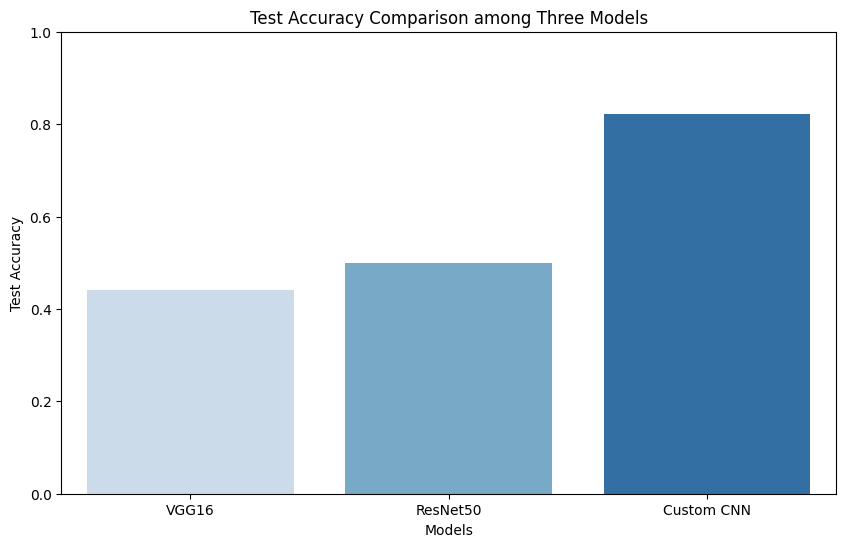

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = ["VGG16", "ResNet50", "Custom CNN"]

# Test accuracies
accuracies = [test_accuracy_vgg, test_accuracy_resnet, test_accuracy_custom_cnn]

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="Blues")
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison among Three Models')
plt.ylim(0, 1)  # Set the y-axis limits to represent accuracy values between 0 and 1
plt.show()